# <center>Pandas for Data Wrangling</center>

<center>Wrangling is cleaning, structuring and enriching raw data into a desired format for better decision making.</center>

## Topics Covered

1- Series

2- DataFrames

3- Missing Data

4- Merging,Joining,and Concatenating

5- GroupBy

6- Operations

7- Data Input and Output

8- Pandas for Plotting

## 1- Series

The first main data type we will learn about for pandas is the Series data type. 

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.


In [1]:
import numpy as np
import pandas as pd

### Creating a Series

We can convert a list,numpy array, or dictionary to a Series:

In [5]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])

d = {'a':10,'b':20,'c':30}

#### Using Lists

In [6]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [7]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [8]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

#### Using NumPy Arrays

In [9]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [10]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int64

#### Using Dictionary

In [11]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Data Types in a Series

A pandas Series can hold a variety of object types:

In [12]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [13]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

### Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

In [14]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])                                   

In [15]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [16]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])                                   

In [17]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [18]:
ser1['USA']

1

Operations are also done based on index like adding two series objects

In [19]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

## 2- DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [2]:
import pandas as pd
import numpy as np

In [3]:
from numpy.random import randn
np.random.seed(101)

In [22]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [23]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


### Selection and Indexing

Grabbing data from a DataFrame

In [24]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [25]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


**Point:** DataFrame Columns are just Series

In [26]:
type(df['W'])

pandas.core.series.Series

### Creating a new column

In [27]:
df['new'] = df['W'] + df['Y']

In [28]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


### Removing Columns

In [29]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [30]:
# Not inplace unless specified!
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [31]:
df.drop('new',axis=1,inplace=True)

In [32]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


### Remove Row

In [33]:
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


### Selecting Rows

In [34]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

Or select based off of position instead of label 

In [35]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

### Selecting subset of rows and columns
Selecting DataFrame rows and columns simultaneously using .loc & .iloc methods.
To select rows and columns, you will need to pass both valid row and column selections separated by a comma to either .iloc or .loc methods.

**df.iloc[row_idxs, column_idxs]**

**df.loc[row_names, column_names]**


In [36]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [37]:
df.iloc[:3, 1:3]

,X,Y
A,0.628133,0.907969
B,-0.319318,-0.848077
C,0.740122,0.528813


In [38]:
df.loc['B','Y']

-0.8480769834036315

In [39]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [40]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [41]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [42]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [43]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [44]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [45]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


For two conditions you can use | and & with parenthesis:

In [46]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


### Setting Index

Resetting the index or setting it something else.

In [47]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [48]:
# Reset to default 0,1...n index
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [49]:
newind = 'CA NY WY OR CO'.split()
newind

['CA', 'NY', 'WY', 'OR', 'CO']

In [50]:
df['States'] = newind

In [51]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [52]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [53]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [54]:
# In-place to persist the change
df.set_index('States',inplace=True)

In [55]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


## 3- Other Operations

Some of the useful operations that could be performed on the pandas dataframe.

### Head

In [56]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [57]:
df.head(2)

,col1,col2,col3
0,1,444,abc
1,2,555,def


### Unique Values and Value Counts

In [58]:
df['col2'].unique()

array([444, 555, 666])

In [59]:
df['col2'].nunique()

3

In [60]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Applying Functions

In [61]:
def times2(x):
    return x*2

In [62]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [63]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [64]:
df['col1'].sum()

10

### Get Column and Index Names

In [65]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [66]:
df.index

RangeIndex(start=0, stop=4, step=1)

### Sorting and Ordering a DataFrame

In [67]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [68]:
df.sort_values(by='col2') #inplace=False by default

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


### Checking Null Values

In [69]:
df.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


### Replace a Value by Some Other

In [70]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [71]:
df.replace(to_replace=555, value=777)

,col1,col2,col3
0,1,444,abc
1,2,777,def
2,3,666,ghi
3,4,444,xyz


## 4- Missing Data

Missing Data can be dealt with:
- Removing the row/record or column
- Replacing the value with some appropriate sustitute
 - By some value
 - By mean
 - By Advanced Methods like KMeans based approximation

In [72]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [73]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [74]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [75]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [76]:
df.dropna(thresh=2) # only the row containing 2 NaN value gets dropped

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [77]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1.0,5.0,1
1,2.0,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [78]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## 5- Concatenating, Joining, and Merging

There are 3 main ways of combining DataFrames together: 
- Concatenation
- Joining
- Merging

**concat**
* A pandas function
* Combines two or more pandas objects vertically or horizontally
* Aligns only on the index
* Errors whenever a duplicate appears in the index
* Defaults to outer join with the option for inner join

**.join**
* A DataFrame method
* Combines two or more pandas objects horizontally
* Aligns the calling DataFrame's column(s) or index with the other object's index (and not the columns)
* Handles duplicate values on the joining columns/index by performing a Cartesian product
* Defaults to left join with options for inner, outer, and right

**.merge**
* A DataFrame method
* Combines exactly two DataFrames horizontally
* Aligns the calling DataFrame's column(s) or index with the other DataFrame's column(s) or index
* Handles duplicate values on the joining columns or index by performing a cartesian product
* Defaults to inner join with options for left, outer, and right

In [4]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [80]:
print(df1,"\n\n")

print(df2,"\n\n")

print(df3,"\n\n")

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3 


    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7 


      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11 




### Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis we are concatenating on. We can use **pd.concat** and pass in a list of DataFrames to concatenate together.

In [5]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [82]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [6]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [7]:
print(left,"\n\n")
print(right,"\n\n")

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2 


     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3 




In [85]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [86]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [8]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [88]:
print(left,"\n\n")
print(right,"\n\n")

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3 


  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3 




In [89]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


Or to show a more complicated example:

In [90]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [91]:
print(left,"\n\n")
print(right,"\n\n")

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3 


  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3 




In [92]:
pd.merge(left, right, on=['key1', 'key2'])
   key   A   B   C   D
0  k0  A0  B0  C0  D0
1  k1  A1  B1  C1  D1
2  k2  A2  B2  C2  D2


IndentationError: unexpected indent (3283177474.py, line 2)

In [93]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [94]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [95]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## 6- Grouping Datasets (groupby)

The groupby method allows us to group rows of data together and call aggregate functions and filter and transforms the data.
During data analysis, it is often essential to cluster or group data together based on certain criteria. For example, an e-commerce store might want to group all the sales that were done during the Christmas period or the orders that were received on Black Friday. These grouping concepts occur in several parts of data analysis.


**Understanding groupby()**
During the data analysis phase, categorizing a dataset into multiple categories or groups is often essential. We can do such categorization using the pandas library. The pandas groupby function is one of the most efficient and time-saving features for doing this. Groupby provides functionalities that allow us to split-apply-combine throughout the dataframe; that is, this function can be used for splitting, applying, and combining dataframes.

Similar to the Structured Query Language (SQL), we can use pandas and Python to execute more complex group operations by using any built-in functions that accept the pandas object or the numpy array.

**groupby mechanics**

While working with the pandas dataframes, our analysis may require us to split our data by certain criteria. Groupby mechanics amass our dataset into various classes in which we can perform exercises and make changes, such as the following:
Grouping by features, hierarchically Aggregating a dataset by groups Applying custom aggregation functions to groups
Transforming a dataset groupwise The pandas groupby method performs two essential functions:
- It splits the data into groups based on some criteria.
- It applies a function to each group independently.
To work with groupby functionalities, we need a dataset that has multiple numerical as well as categorical records in it so that we can group by different categories and ranges.


The dataset is form here: https://www.kaggle.com/toramky/automobile-dataset

In [96]:
df = pd.read_csv("Automobile_data.csv")
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


Using the groupby() function lets us group this dataset on the basis of the body-style column

In [97]:
df.groupby('body-style').groups.keys()

dict_keys(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'])

From the preceding output, we know that the body-style column has five unique values, including convertible, hardtop, hatchback, sedan, and wagon.

Now, we can group the data based on the body-style column. Next, let's print the values contained in that group that have the body-style value of convertible.

In [98]:
# Group the dataset by the column body-style
style = df.groupby('body-style')
# Get values items from group with value convertible
style.get_group("convertible")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,35056
128,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028
172,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669
189,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,11595


**Selecting a subset of columns**
To form groups based on multiple categories, we can simply specify the column names in the groupby() function. Grouping will be done simultaneously with the first category, the second category, and so on. Let's groupby using two categories, body-style and drive wheels, as follows:

In [99]:
double_grouping = df.groupby(["body-style","drive-wheels"])
double_grouping.first()

symboling normalized-losses           make  \
body-style  drive-wheels                                               
convertible fwd                   3                 ?     volkswagen   
            rwd                   3                 ?    alfa-romero   
hardtop     fwd                   2               168         nissan   
            rwd                   0                93  mercedes-benz   
hatchback   4wd                   0                 ?           audi   
            fwd                   2               121      chevrolet   
            rwd                   1                 ?    alfa-romero   
sedan       4wd                   2               164           audi   
            fwd                   2               164           audi   
            rwd                   2               192            bmw   
wagon       4wd                   0                85         subaru   
            fwd                   1                 ?           audi   
            rwd                  -1                93  mercedes-benz   

                         fuel-type aspiration num-of-doors engine-location  \
body-style  drive-wheels                                                     
convertible fwd                gas        std          two           front   
            rwd                gas        std          two           front   
hardtop     fwd                gas        std          two           front   
            rwd             diesel      turbo          two           front   
hatchback   4wd                gas      turbo          two           front   
            fwd                gas        std          two           front   
            rwd                gas        std          two           front   
sedan       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd                gas        std          two           front   
wagon       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd             diesel      turbo         four           front   

                          wheel-base  length  width  ...  engine-size  \
body-style  drive-wheels                             ...                
convertible fwd                 94.5   159.3   64.2  ...          109   
            rwd                 88.6   168.8   64.1  ...          130   
hardtop     fwd                 95.1   162.4   63.8  ...           97   
            rwd                106.7   187.5   70.3  ...          183   
hatchback   4wd                 99.5   178.2   67.9  ...          131   
            fwd                 88.4   141.1   60.3  ...           61   
            rwd                 94.5   171.2   65.5  ...          152   
sedan       4wd                 99.4   176.6   66.4  ...          136   
            fwd                 99.8   176.6   66.2  ...          109   
            rwd                101.2   176.8   64.8  ...          108   
wagon       4wd                 96.9   173.6   65.4  ...          108   
            fwd                105.8   192.7   71.4  ...          136   
            rwd                110.0   190.9   70.3  ...          183   

                          fuel-system  bore stroke  compression-ratio  \
body-style  drive-wheels                                                
convertible fwd                  mpfi  3.19    3.4                8.5   
            rwd                  mpfi  3.47   2.68                9.0   
hardtop     fwd                  2bbl  3.15   3.29                9.4   
            rwd                   idi  3.58   3.64               21.5   
hatchback   4wd                  mpfi  3.13    3.4                7.0   
            fwd                  2bbl  2.91   3.03                9.5   
            rwd                  mpfi  2.68   3.47                9.0   
sedan       4wd      

Not only can we group the dataset with specific criteria, but we can also perform arithmetic operations directly on the whole group at the same time and print the output as a series or dataframe. There are functions such as max(), min(), mean(), first(), and last() that can be directly applied to the GroupBy object in order to obtain summary statistics for each group.

#### Max and Min

In [100]:
# max() will print the maximum entry of each group
style['normalized-losses'].max()

body-style
convertible    ?
hardtop        ?
hatchback      ?
sedan          ?
wagon          ?
Name: normalized-losses, dtype: object

In [101]:
# min() will print the minimum entry of each group
style['normalized-losses'].min()

body-style
convertible    134
hardtop        134
hatchback      101
sedan          102
wagon          103
Name: normalized-losses, dtype: object

#### Mean

In [102]:
# mean() will print mean of numerical column in each group
style.mean()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
body-style,,,,,,,,,,
convertible,2.833333,92.700000,170.383333,65.583333,51.433333,2801.666667,157.166667,8.933333,20.500000,26.000000
hardtop,1.875000,98.500000,176.937500,66.612500,52.850000,2810.625000,176.250000,10.725000,21.625000,27.250000
hatchback,1.585714,95.535714,166.592857,65.247143,52.108571,2348.185714,114.400000,9.027429,26.314286,32.171429
sedan,0.333333,100.619792,177.585417,66.260417,54.337500,2610.593750,130.822917,10.937500,25.322917,30.833333
wagon,-0.160000,102.156000,181.304000,66.256000,56.728000,2784.240000,123.840000,10.316000,24.040000,28.720000


In [103]:
# get mean of each column of specific group
style.get_group("hatchback").mean()

/tmp/ipykernel_3423/1285524455.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  style.get_group("hatchback").mean()


symboling               1.585714
wheel-base             95.535714
length                166.592857
width                  65.247143
height                 52.108571
curb-weight          2348.185714
engine-size           114.400000
compression-ratio       9.027429
city-mpg               26.314286
highway-mpg            32.171429
dtype: float64

We can also count the number of symboling/records in each group.

In [104]:
# get the number of symboling/records in each group
style['symboling'].count()

body-style
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: symboling, dtype: int64

#### Data Aggregation Techniques
Having understood the counting part, NOW we are going to discuss different types of data aggregation techniques.

Some of the most frequently used aggregations are as follows:

- sum: Returns the sum of the values for the requested axis
- min: Returns the minimum of the values for the requested axis
- max: Returns the maximum of the values for the requested axis

We can apply aggregation in a DataFrame, df, as df.aggregate() or df.agg().

In [105]:
# Since aggregation only works with numeric type columns, let's take some of the numeric
# columns from the dataset and apply some aggregation functions to them:

# new dataframe that consist length,width,height,curb-weight and price
new_dataset = df.filter(["length","width","height","curbweight","price"],axis=1)
new_dataset

,length,width,height,price
0,168.8,64.1,48.8,13495
1,168.8,64.1,48.8,16500
2,171.2,65.5,52.4,16500
3,176.6,66.2,54.3,13950
4,176.6,66.4,54.3,17450
...,...,...,...,...
200,188.8,68.9,55.5,16845
201,188.8,68.8,55.5,19045
202,188.8,68.9,55.5,21485
203,188.8,68.9,55.5,22470


In [106]:
# applying single aggregation for mean over the columns
new_dataset.agg("mean", axis="rows")

/tmp/ipykernel_3423/385046320.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_dataset.agg("mean", axis="rows")


length    174.049268
width      65.907805
height     53.724878
dtype: float64

In [107]:
# applying aggregation sum and minimum across all the columns
new_dataset.agg(['sum', 'min'])

,length,width,height,price
sum,35680.1,13511.1,11013.6,134951650016500139501745015250177101892023875?...
min,141.1,60.3,47.8,10198


**READING ASSIGNMNET :**

READ next topics from Hands-on Exploratory Data Analysis with Python Chapter:06.
- Group-wise Operations
- Group-wise Transformations
- Pivot Tables and Cross-Tabulations

## 7- Discretization and Binning

Often when working with continuous datasets, we need to convert them into discrete or interval forms. Each interval is referred to as a bin, and hence the name binning came to be.


In [108]:
height = [120, 122, 125, 127, 121, 123, 137, 131, 161, 145, 141, 132]

To convert the preceding dataset into intervals, we can use the cut() method provided by the pandas library

In [109]:
bins = [118, 125, 135, 160, 200]
category = pd.cut(height, bins)

In [110]:
category

[(118, 125], (118, 125], (118, 125], (125, 135], (118, 125], ..., (125, 135], (160, 200], (135, 160], (135, 160], (125, 135]]
Length: 12
Categories (4, interval[int64, right]): [(118, 125] < (125, 135] < (135, 160] < (160, 200]]

On looking closely at the output, it could be seen that there are mathematical notations for intervals.
- A parenthesis indicates that the side is open.
- A square bracket means that it is closed or inclusive.

(118, 125] means the left-hand side is open and the right-hand side is closed. Hence, 118 is not included, but anything greater than 118 is included, while 125 is included in the interval.

We can check the number of values in each bin by using the

In [111]:
pd.value_counts(category)

(118, 125]    5
(125, 135]    3
(135, 160]    3
(160, 200]    1
dtype: int64

We can also indicate the bin names by passing a list of labels.
Note that we are passing at least two arguments, the data that needs to be discretized and the required number of bins. Furthermore, we are using a right=False argument to change the form of interval.

In [112]:
bin_names = ['Short Height', 'Average height', 'Good Height', 'Taller']
pd.cut(height, bins, labels=bin_names)

['Short Height', 'Short Height', 'Short Height', 'Average height', 'Short Height', ..., 'Average height', 'Taller', 'Good Height', 'Good Height', 'Average height']
Length: 12
Categories (4, object): ['Short Height' < 'Average height' < 'Good Height' < 'Taller']

## 8- Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [113]:
import numpy as np
import pandas as pd

### CSV

#### CSV Input

In [114]:
df = pd.read_csv('example')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


#### CSV Output

In [115]:
df.to_csv('abc',index=False)

## 9- Pnadas for Plotting

### Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

We can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)

In [116]:
df1 = pd.read_csv('df1',index_col=None)
df2 = pd.read_csv('df2', index_col=None)

#### Area Plot

<AxesSubplot:>

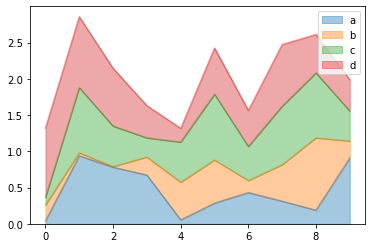

In [117]:
df2.plot.area(alpha=0.4)

#### Bar Plot

<AxesSubplot:>

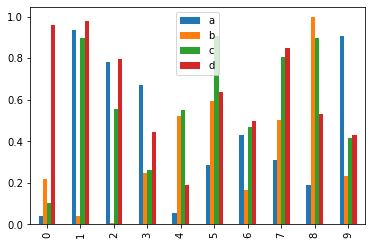

In [118]:
df2.plot.bar()

#### Histogram Plot

<AxesSubplot:ylabel='Frequency'>

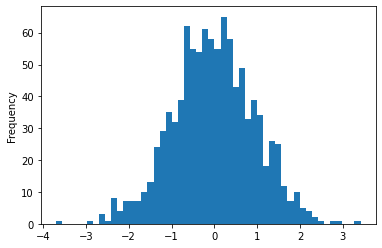

In [119]:
df1['A'].plot.hist(bins=50)

#### Line Plot

In [120]:
df3 = pd.read_csv('df3', index_col=None)
df3.head(3)

,a,b,c,d
0,0.336272,0.325011,0.001020,0.401402
1,0.980265,0.831835,0.772288,0.076485
2,0.480387,0.686839,0.000575,0.746758


<AxesSubplot:>

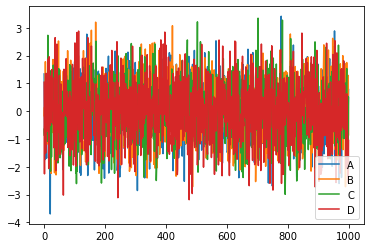

In [121]:
df1.plot.line()

#### Scatter Plot

<AxesSubplot:xlabel='A', ylabel='B'>

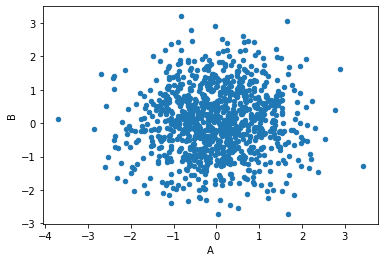

In [122]:
df1.plot.scatter(x='A',y='B')

#### Box Plot

<AxesSubplot:>

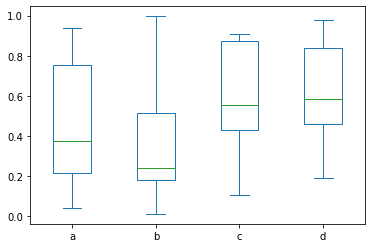

In [123]:
df2.plot.box()